# Testando os resultados das duas buscas em grade com os 20 atributos selecionados com a correlação de Pearson

In [1]:
import pandas as pd
import numpy as np
from utilities.show_results import plot_confusion_matrix, get_accuracy, get_precision, f_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from joblib import dump, load

## Carregando os datasets

Abrindo:
1. grid_1: Dataset contendo os resultados da busca em grade utilizando os 20 atributos considerando a função de ativação sigmoide na busca
2. grid_2: Dataset contendo os resultados da busca em grade utilizando os 20 atributos sem considerar a função de ativação sigmoide na busca
3. Dataset contendo os 20 atributos preditores + o atributo alvo (data)

In [2]:
grid_1  = pd.read_csv('output/PCOS_20_attr.csv')
grid_2 = pd.read_csv('output/PCOS_20_relu.csv')
data = pd.read_csv('data/PCOS_selected_pearson.csv')

# grid_2.sort_values(by='rank_test_score', inplace=True)
# grid_1.sort_values(by='rank_test_score', inplace=True)

In [3]:
grid_2.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_beta_1,param_beta_2,param_hidden_layer_sizes,param_max_iter,...,param_verbose,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.200517,0.002737,0.000525,0.000004,relu,32,0.9,0.9,"(5, 4)",500,...,False,"{'activation': 'relu', 'batch_size': 32, 'beta...",0.960526,0.946667,0.946667,0.920000,0.933333,0.941439,0.013743,1
1,2.070362,0.008326,0.000514,0.000006,relu,32,0.9,0.9,"(6, 3)",500,...,False,"{'activation': 'relu', 'batch_size': 32, 'beta...",0.934211,0.933333,0.946667,0.933333,0.933333,0.936175,0.005257,2


In [4]:
data.head(2)

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg),...,Cycle length(days),Hair loss(Y/N),Age (yrs),Waist(inch),Hip(inch),Avg. F size (L) (mm),Marraige Status (Yrs),Endometrium (mm),Avg. F size (R) (mm),PCOS (Y/N)
0,3,3,0,0,0,2,1.0,0,2.07,44.6,...,5,0,28,30,36,18.0,7.0,8.5,18.0,0
1,5,3,0,0,0,2,0.0,0,1.53,65.0,...,5,0,36,32,38,15.0,11.0,3.7,14.0,0


## Separando os atributos preditores do atributo alvo

In [5]:
X = data.drop(columns=['PCOS (Y/N)'], axis=1)
y = data["PCOS (Y/N)"]

## Separando o conjunto de teste e treino

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)

X_train.shape, X_test.shape, (y_test == 1).sum(), (y_test == 0).sum()

((376, 20), (162, 20), 53, 109)

In [7]:
X_train_norm = (X_train - np.min(X_train))/(np.max(X_train) - np.min(X_train))

X_test_norm = (X_test - np.min(X_train))/(np.max(X_train) - np.min(X_train))

C:\Users\Callidus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Callidus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


## Carregando e treinando os três melhores conjuntos de hipeparâmetros da primeira busca em grade

A primeira busca em grade considera "logistic" em sua lista de hiperparâmetros

In [8]:
grid_1["params"].iloc[0]

"{'activation': 'relu', 'batch_size': 16, 'beta_1': 0.8, 'beta_2': 0.95, 'hidden_layer_sizes': (2, 11), 'max_iter': 300, 'n_iter_no_change': 25, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.9198
PRECISÃO: 0.9198


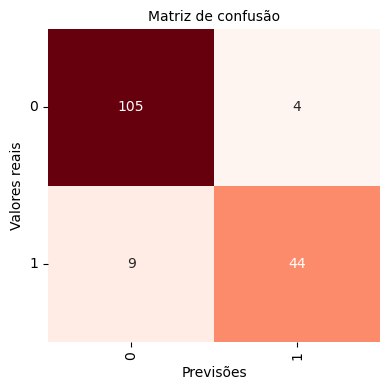

In [9]:
mlp_1 = MLPClassifier(
    verbose= False,
    max_iter=300, 
    activation='relu', 
    hidden_layer_sizes=(2,11),
    batch_size=16,
    beta_1=0.8,
    beta_2=0.95,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=25
)
mlp_1.fit(X_train_norm.values, y_train)

y_pred = mlp_1.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [10]:
grid_1["params"].iloc[1]

"{'activation': 'relu', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.95, 'hidden_layer_sizes': (4, 9), 'max_iter': 300, 'n_iter_no_change': 25, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.8704
PRECISÃO: 0.8704


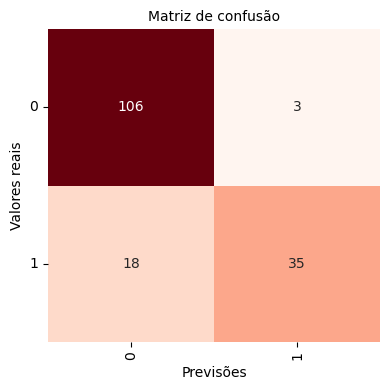

In [11]:
mlp_2 = MLPClassifier(
    verbose= False,
    max_iter=300, 
    activation='relu', 
    hidden_layer_sizes=(4,9),
    batch_size=16,
    beta_1=0.9,
    beta_2=0.95,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=25
)
mlp_2.fit(X_train_norm.values, y_train)

y_pred = mlp_2.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [12]:
grid_1["params"].iloc[2]

"{'activation': 'logistic', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.9, 'hidden_layer_sizes': (6, 14), 'max_iter': 500, 'n_iter_no_change': 25, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.9259
PRECISÃO: 0.9259


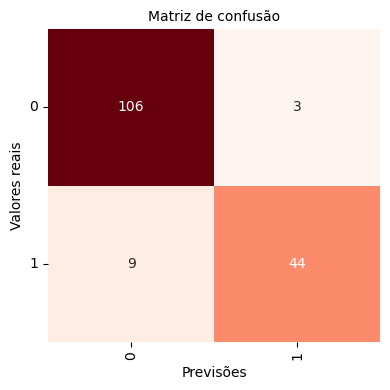

In [13]:
mlp_3 = MLPClassifier(
    verbose= False,
    max_iter=500, 
    activation='relu', 
    hidden_layer_sizes=(6,14),
    batch_size=16,
    beta_1=0.9,
    beta_2=0.9,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=25
)
mlp_3.fit(X_train_norm.values, y_train)

y_pred = mlp_3.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

## Carregando e treinando os três melhores conjuntos de hipeparâmetros da segunda busca em grade

A segunda busca em grade não considera "logistic" em sua lista de hiperparâmetros

In [14]:
grid_2["params"].iloc[0]

"{'activation': 'relu', 'batch_size': 32, 'beta_1': 0.9, 'beta_2': 0.9, 'hidden_layer_sizes': (5, 4), 'max_iter': 500, 'n_iter_no_change': 100, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.9136
PRECISÃO: 0.9136


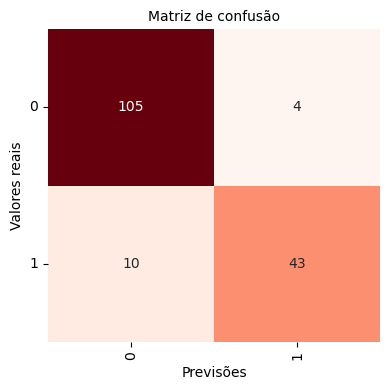

In [15]:
clf_1 = MLPClassifier(
    verbose= False,
    max_iter=500, 
    activation='relu', 
    hidden_layer_sizes=(5,4),
    batch_size=32,
    beta_1=0.9,
    beta_2=0.9,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=100
)
clf_1.fit(X_train_norm.values, y_train)

y_pred = clf_1.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [16]:
grid_2["params"].iloc[1]

"{'activation': 'relu', 'batch_size': 32, 'beta_1': 0.9, 'beta_2': 0.9, 'hidden_layer_sizes': (6, 3), 'max_iter': 500, 'n_iter_no_change': 100, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.9136
PRECISÃO: 0.9136


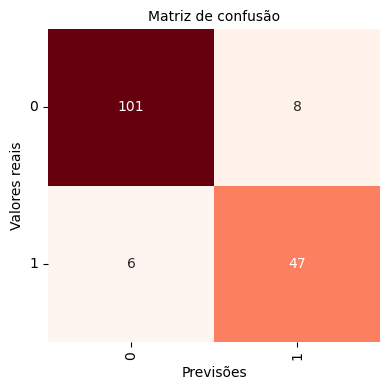

In [17]:
clf_2 = MLPClassifier(
    verbose= False,
    max_iter=500, 
    activation='relu', 
    hidden_layer_sizes=(6,3),
    batch_size=32,
    beta_1=0.9,
    beta_2=0.9,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=100
)
clf_2.fit(X_train_norm.values, y_train)

y_pred = clf_2.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [18]:
grid_2["params"].iloc[2]

"{'activation': 'relu', 'batch_size': 32, 'beta_1': 0.95, 'beta_2': 0.95, 'hidden_layer_sizes': (2, 12), 'max_iter': 500, 'n_iter_no_change': 100, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.9136
PRECISÃO: 0.9136


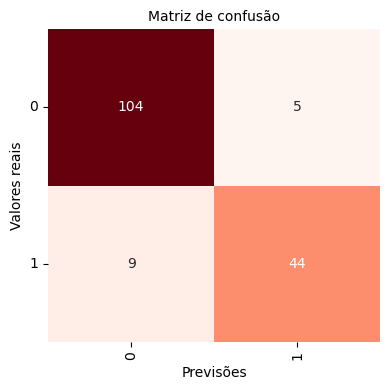

In [19]:
clf_3 = MLPClassifier(
    verbose= False,
    max_iter=500, 
    activation='relu', 
    hidden_layer_sizes=(2, 12),
    batch_size=32,
    beta_1=0.95,
    beta_2=0.95,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=100
)
clf_3.fit(X_train_norm.values, y_train)

y_pred = clf_3.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

## Salvando a melhor MLP

ACURÁCIA: 0.9238
PRECISÃO: 0.9238


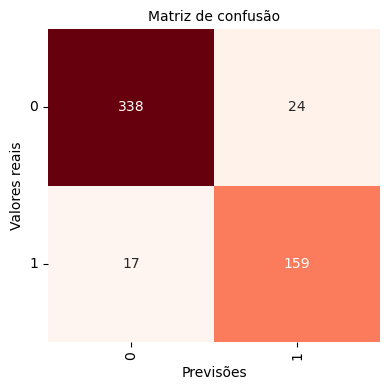

In [22]:
clf = clf_2.fit(X.values, y)

y_pred = clf.predict(X.values)
get_accuracy(y, y_pred)
get_precision(y, y_pred)
plot_confusion_matrix(y, y_pred)

In [23]:
dump(clf, 'models/pcos-diagnosis-20-params.joblib')

['models/pcos-diagnosis-20-params.joblib']